<a href="https://colab.research.google.com/github/jhordan64/Portafolio_Jhordan/blob/main/Proyecto_FInal_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL



- JHORDAN BRAYAN MEDINA MONTOYA


El conjunto de datos de la base de datos esta conformado por información detallada sobre las ventas de equipos celulares en diferentes dias, ubicaciones. Además de tipo de celular, tipo de venta y tipo de gama.

In [ ]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargamos la información
df = pd.read_excel("/content/1. Base_proyecto.xlsx")

## Nivel Básico

1. Haga una descripción general de los Datos.

Observaciones y variables

In [ ]:
num_observaciones, num_variables = df.shape
print(f"El numero de observaciones es {num_observaciones} y el numero de variables es {num_variables} del conjunto de datos")

El numero de observaciones es 19552 y el numero de variables es 19 del conjunto de datos


Tipos de variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19552 entries, 0 to 19551
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       19552 non-null  int64  
 1   Dia           19552 non-null  int64  
 2   EquipoSim     19552 non-null  object 
 3   Tipo          19552 non-null  object 
 4   Subtipo       19552 non-null  object 
 5   Marca         19552 non-null  object 
 6   Gama          19552 non-null  object 
 7   Precio        0 non-null      float64
 8   Ingreso       19552 non-null  float64
 9   Costo         19552 non-null  float64
 10  Margen        19552 non-null  float64
 11  Rentabilidad  0 non-null      float64
 12  Tipo Venta    19552 non-null  object 
 13  CanalVenta    19551 non-null  object 
 14  CadenaDealer  16243 non-null  object 
 15  Departamento  19404 non-null  object 
 16  Canal         19552 non-null  object 
 17  SubCanal      19552 non-null  object 
 18  Cluster       19404 non-nu

Pequeño vistazo de los datos

In [ ]:
df.head(5)

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Precio,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,202110,13,Equipo,Celular,Smartphone,ZTE,1. Low,NaN,173.03390,192.39,-19.35610,NaN,Porta,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,NaN,355.22030,338.88,16.34030,NaN,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,NaN,725.38980,769.94,-44.55020,NaN,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B
3,202110,17,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,56.23729,35.41,20.82729,NaN,VR,GRANDES TIENDAS,PLAZAVEA,ICA,Retail,GRANDES TIENDAS,Cluster A
4,202110,26,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,49.70339,34.85,14.85339,NaN,Porta,GRANDES TIENDAS,METRO,LIMA,Retail,GRANDES TIENDAS,Cluster A


2. Realice estadísticas descriptivas para las variables que usted crea conveniente

In [ ]:
df.describe()

,Periodo,Dia,Precio,Ingreso,Costo,Margen,Rentabilidad
count,19552.0,19552.000000,0.0,19552.000000,19552.000000,19552.000000,0.0
mean,202110.0,15.902619,NaN,333.531571,351.304694,-17.773123,NaN
std,0.0,8.843870,NaN,243.325959,252.156903,70.165282,NaN
min,202110.0,1.000000,NaN,7.118644,27.970000,-1379.876800,NaN
25%,202110.0,8.000000,NaN,141.661000,157.060000,-50.951300,NaN
50%,202110.0,16.000000,NaN,298.271200,338.120000,-13.357800,NaN
75%,202110.0,23.000000,NaN,471.847400,540.405000,21.497290,NaN
max,202110.0,31.000000,NaN,4177.932000,4271.580000,1125.119000,NaN


## Nivel Intermedio

3. Haga análisis de los Valores Faltantes.

In [ ]:
df.isnull().sum()

Periodo             0
Dia                 0
EquipoSim           0
Tipo                0
Subtipo             0
Marca               0
Gama                0
Precio          19552
Ingreso             0
Costo               0
Margen              0
Rentabilidad    19552
Tipo Venta          0
CanalVenta          1
CadenaDealer     3309
Departamento      148
Canal               0
SubCanal            0
Cluster           148
dtype: int64

<ipython-input-8-1f2365437abe>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.null = df.isnull().melt()


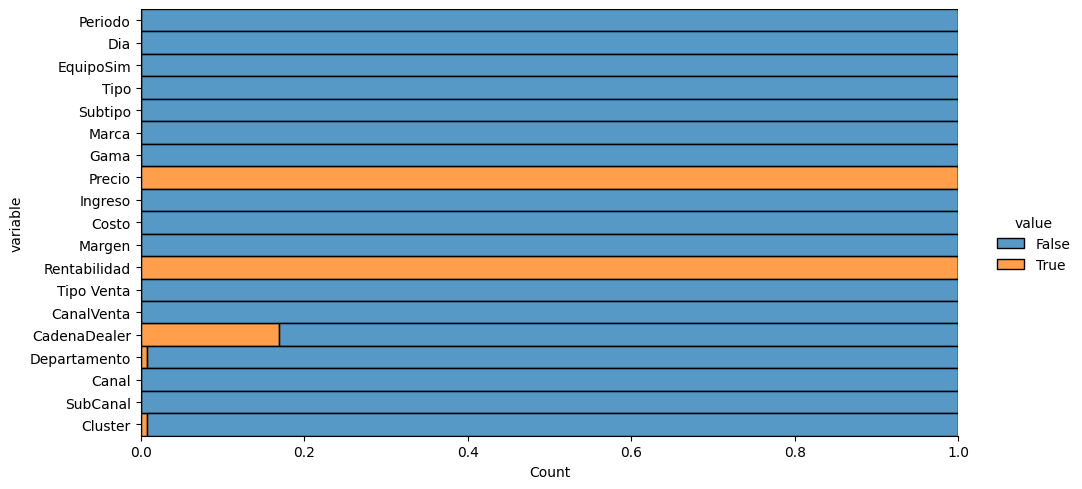

In [ ]:
df.null = df.isnull().melt()

sns.displot(data=df.null,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2)
plt.show()

In [ ]:
df['Subtipo'] = df['Subtipo'].str.lower()  # Convierte a minúsculas antes de agrupar

In [ ]:
# Contar la cantidad de clases únicas en la columna 'Subtipo'
cantidad_clases_subtipo = df['Subtipo'].value_counts()

# Mostrar el resultado
print("Cantidad de clases por Subtipo:")
print(cantidad_clases_subtipo)

Cantidad de clases por Subtipo:
smartphone    19421
feature         131
Name: Subtipo, dtype: int64


In [ ]:
df['Tipo'] = df['Tipo'].str.lower()  # Convierte a minúsculas antes de agrupar

In [ ]:
# Contar la cantidad de clases únicas en la columna 'Tipo'
cantidad_clases_tipo = df['Tipo'].value_counts()

# Mostrar el resultado
print("Cantidad de clases por Tipo:")
print(cantidad_clases_tipo)

Cantidad de clases por Tipo:
celular    19552
Name: Tipo, dtype: int64


Limpieza de datos, eliminación de filas con valores vacios en cluster

In [ ]:
# Eliminar filas con valores vacíos en la columna 'Cluster'
df = df.dropna(subset=['Cluster'])

Llenar los campos vacios de CadenaDealer

In [ ]:
# Llenar los campos con "N/E" en las filas donde 'CadenaDealer' está vacío
df['CadenaDealer'] = df['CadenaDealer'].fillna('N/E')

Visualización para verificar que la limpieza y transformación fue exitosa

<ipython-input-15-1f2365437abe>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.null = df.isnull().melt()


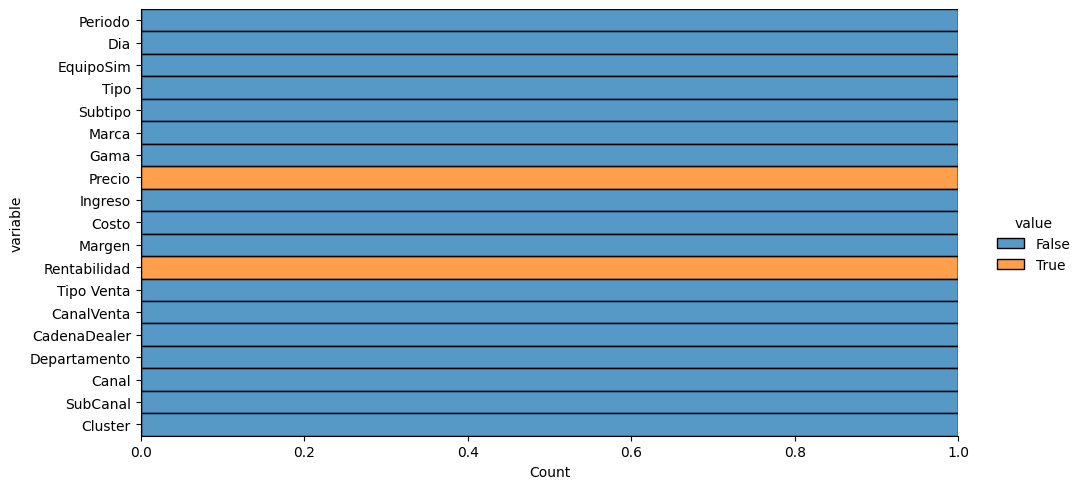

In [ ]:
df.null = df.isnull().melt()

sns.displot(data=df.null,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2)
plt.show()

4. Visualice los gráficos que sean necesarios (5 gráficos como máximo)

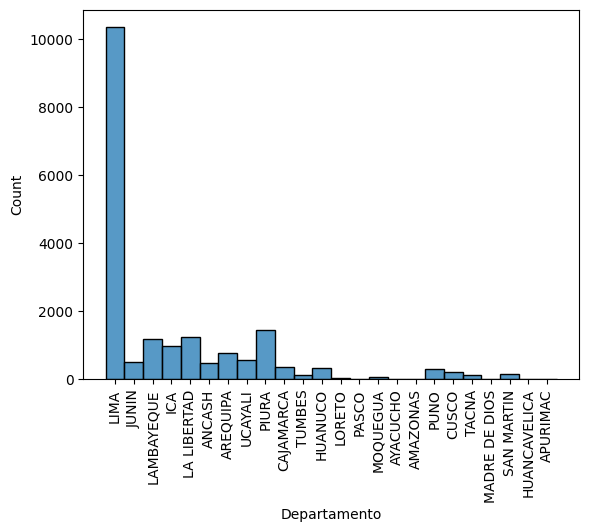

In [ ]:
sns.histplot(
    data=df['Departamento'],
    #bins=10,
    kde=False
)
plt.xticks(rotation='vertical')
plt.show()

Según el gráfico, podemos observar que la mayor cantidad de ventas de los dispositivos se realizó en el departamento de Lima, seguido de Piura (pero con notable diferencia), este gráfico nos permite ver de qué lugar provienen mayoritariamente los ingresos, lo que puede permitir a su vez aplicar estrategias de ventas en los departamentos que no tienen tanta participación y mantener las estrategias que se están implementando en Lima.

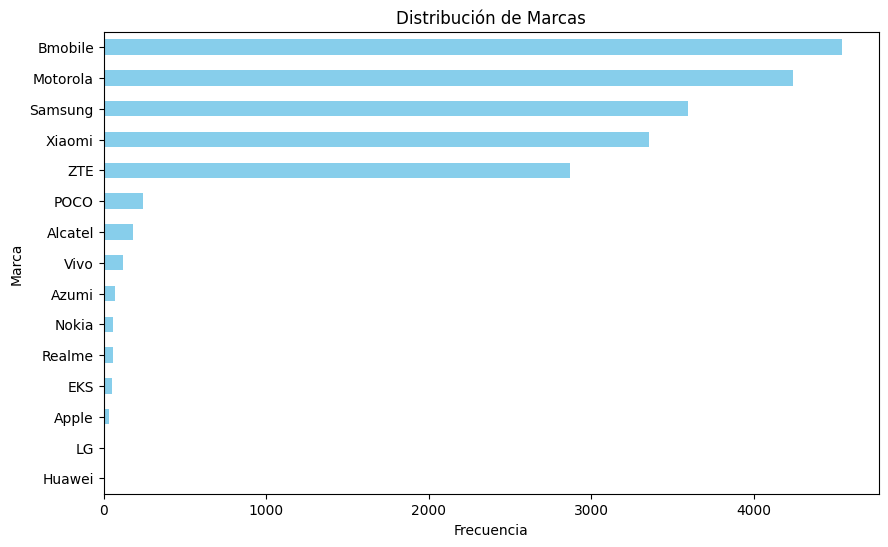

In [ ]:
conteo_por_marca = df['Marca'].value_counts()

plt.figure(figsize=(10, 6))

porcentajes_filtrados = conteo_por_marca[conteo_por_marca >= 0.2]

# Crea un gráfico de barras horizontal
porcentajes_filtrados.plot(kind='barh', color='skyblue')

plt.xlabel('Frecuencia')
plt.ylabel('Marca')
plt.title('Distribución de Marcas')

# Invierte el eje y para que la marca con mayor frecuencia esté en la parte superior
plt.gca().invert_yaxis()

plt.show()

De este gráfico, podemos apreciar cuáles son las marcas más compradas, en este caso son: Bmobile, seguido de Motorola, Samsung, Xiaomi y ZTE, permitiendo así ver las preferencias de los consumidores y sirviendo para poder aplicar estrategias de ventas.

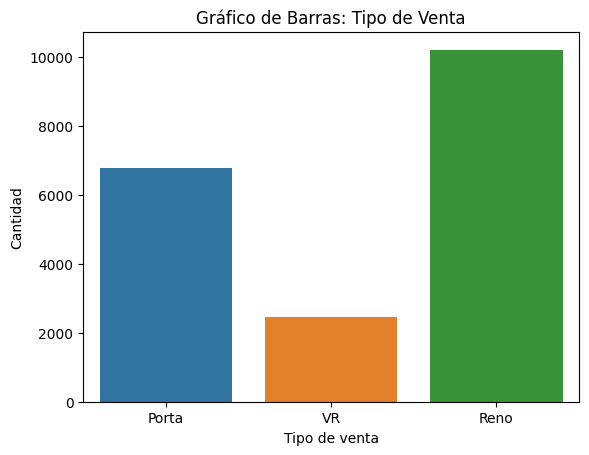

In [ ]:
import seaborn as sns

sns.countplot(x='Tipo Venta', data=df)
plt.title('Gráfico de Barras: Tipo de Venta')
plt.xlabel('Tipo de venta')
plt.ylabel('Cantidad')


plt.show()


Con este gráfico, podemos apreciar qué tipo de venta es la mas recurrente, en este caso es el tipo de venta Renovación, lo cuál puede explicar que existan costos más altos que los ingresos debido al bajo precio con el cuál se ofrecen los dispositivos en este tipo de ventas haciendo que existan márgenes negativos en la mayoría de casos.

5. Realice un headmap con las variables que usted considere


In [ ]:
#Reconocer el tipo de variable que maneja la base de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19404 entries, 0 to 19551
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       19404 non-null  int64  
 1   Dia           19404 non-null  int64  
 2   EquipoSim     19404 non-null  object 
 3   Tipo          19404 non-null  object 
 4   Subtipo       19404 non-null  object 
 5   Marca         19404 non-null  object 
 6   Gama          19404 non-null  object 
 7   Precio        0 non-null      float64
 8   Ingreso       19404 non-null  float64
 9   Costo         19404 non-null  float64
 10  Margen        19404 non-null  float64
 11  Rentabilidad  0 non-null      float64
 12  Tipo Venta    19404 non-null  object 
 13  CanalVenta    19403 non-null  object 
 14  CadenaDealer  19404 non-null  object 
 15  Departamento  19404 non-null  object 
 16  Canal         19404 non-null  object 
 17  SubCanal      19404 non-null  object 
 18  Cluster       19404 non-nu

**HEADMAP DE VARIABLES CUALITATIVAS**

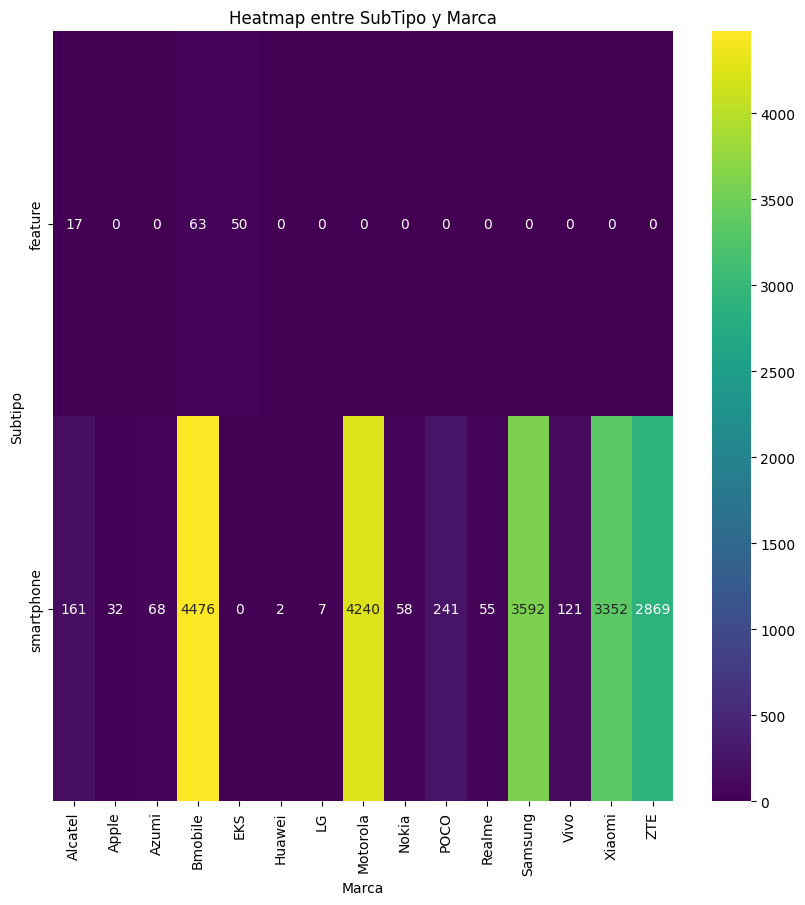

In [ ]:
#HEADMAP ENTRE LAS VARIABLES SUBTIPO Y MARCA
plt.figure(figsize=(10, 10))
sns.heatmap(pd.crosstab(df['Subtipo'], df['Marca']), annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap entre SubTipo y Marca')
plt.show()

*Comentario*: Podemos mencionar que las dos marcas principales que vende Features son EKS y Bmobile mientras que las demás marcas no ofrecen este tipo de producto. En cuanto a la marca de los Smartphone, los principales vendedores son Bmolbile y Motorola, mientras que los que tienen poca presencia son Huawei y LG.

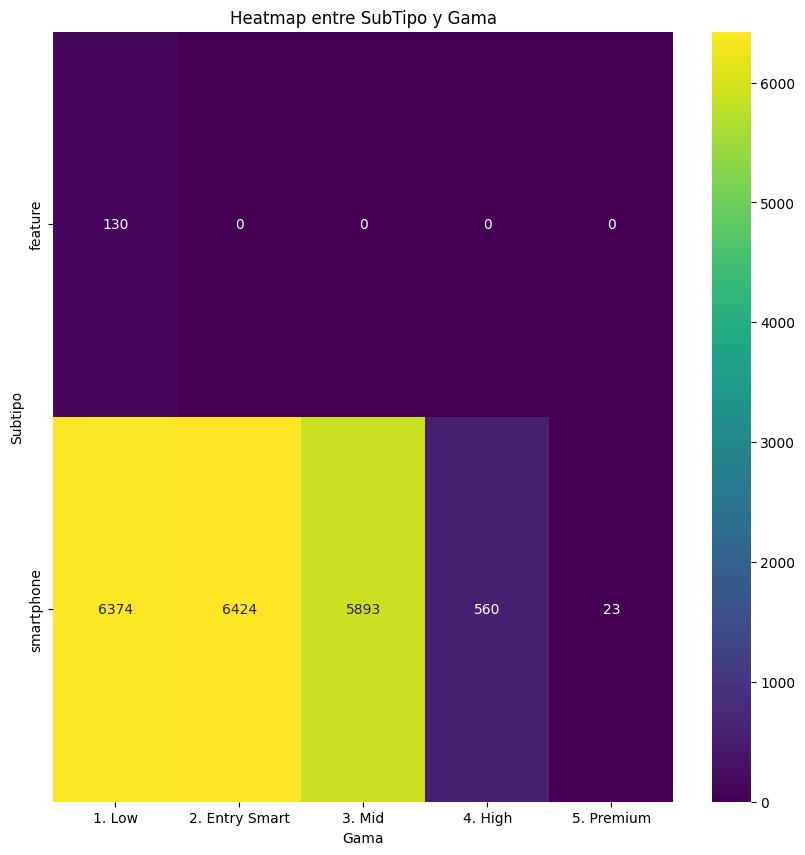

In [ ]:
#HEADMAP ENTRE LAS VARIABLES SUBTIPO Y GAMA
plt.figure(figsize=(10, 10))
sns.heatmap(pd.crosstab(df['Subtipo'], df['Gama']), annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap entre SubTipo y Gama')
plt.show()

*Comentario*: Los smartphones que más se venden son los de gama Low(baja), Entry smart y Mind Gama, mientras que para los Features son simplemente de gama Low. Es un comportamiento esperado ya que por lo general los de alta gama o Premiun son los que menos se venden por su elevado precio.

**HEADMAP DE VARIABLES CUANTITATIVAS**

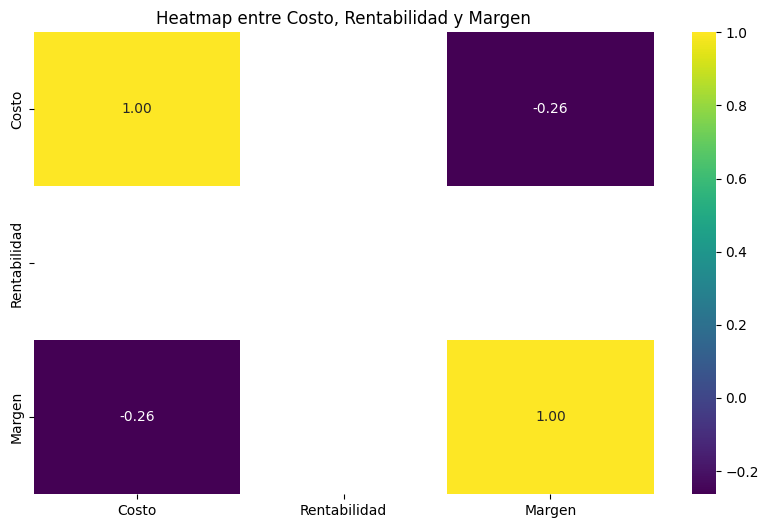

In [ ]:
#HEADMAP ENTRE LAS VARIABLES COSTO, RENTABILIDAD Y MARGEN
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Costo', 'Rentabilidad','Margen']].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap entre Costo, Rentabilidad y Margen')
plt.show()

Podemos observar que la correlacion mas alta se da entre margen y rentabilidad, es algo esperado ya que existe una proporcion directa entre estas dos variables, sin embargo hay una correlacion negativa baja entre rentabilidad y costo, pero tambien es un valor esperado ya que cuanto mayor es el costo este reducira a rentabilidad.

## Nivel Data Analyst

6. ¿Cuál es la distribución de la Gama de los equipos?

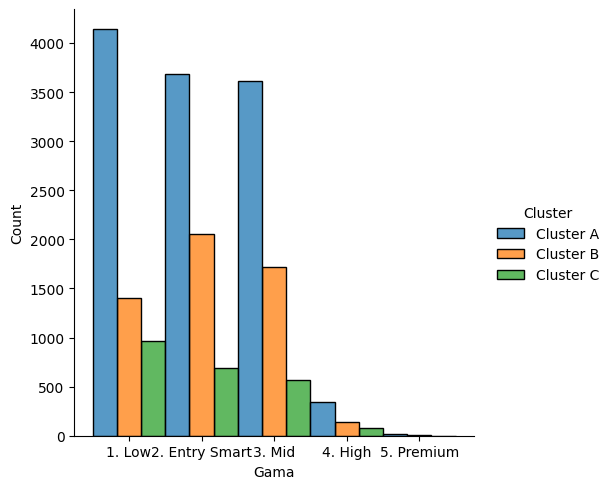

In [ ]:
sns.displot(
    data=df,
    x='Gama',
    hue='Cluster',
    multiple='dodge'
    )
plt.show()

7. ¿Que Cluster trae más ingresos, Cluster A, B y C?

In [ ]:
# Agrupar por cluster y sumar los ingresos para cada cluster
ingresos_por_cluster = df.groupby('Cluster')['Ingreso'].sum()
# Mostrar los ingresos totales por cada cluster
print(ingresos_por_cluster)

Cluster
Cluster A    3.900315e+06
Cluster B    1.873229e+06
Cluster C    6.955477e+05
Name: Ingreso, dtype: float64


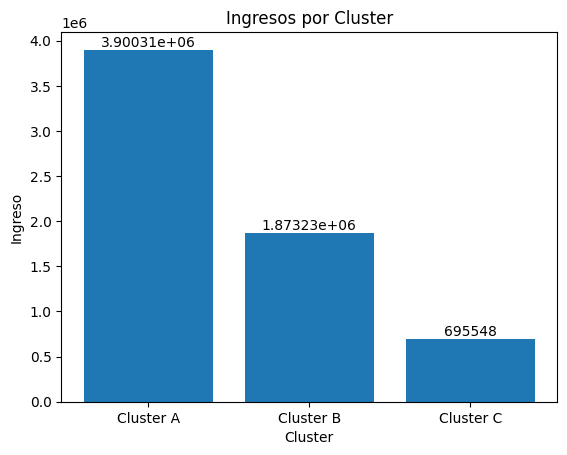

El cluster con más ingresos es el Cluster Cluster A


In [ ]:
# Calcular el total de ingresos por cluster
total_ingresos_por_cluster = df.groupby('Cluster')['Ingreso'].sum()
# Graficar los ingresos por cluster
bars = plt.bar(total_ingresos_por_cluster.index, total_ingresos_por_cluster.values)
plt.bar_label(bars)
plt.xlabel('Cluster')
plt.ylabel('Ingreso')
plt.title('Ingresos por Cluster')
plt.show()
# Encontrar el cluster con más ingresos
cluster_mas_ingresos = total_ingresos_por_cluster.idxmax()
print(f"El cluster con más ingresos es el Cluster {cluster_mas_ingresos}")

8. ¿Qué gama tiene mejor margen en el cluster C?

In [ ]:
# Filtra el DataFrame para obtener solo el Cluster C
df_cluster_c = df[df['Cluster'] == 'Cluster C']
# Agrupa por 'Gama' y suma los márgenes para cada gama
sumas_por_gama = df_cluster_c.groupby('Gama')['Margen'].sum()
# Encuentra la gama con el mayor valor y su valor asociado
gama_mejor_margen = sumas_por_gama.idxmax()
valor_mejor_margen = sumas_por_gama.max()
# Imprime los resultados
print(f"En el Cluster C, la gama con el mejor margen es: {gama_mejor_margen} con un valor total de margen de:{valor_mejor_margen}")

En el Cluster C, la gama con el mejor margen es: 1. Low con un valor total de margen de:19189.69039


9. ¿Qué Canal tiene mayores márgenes?
(Canal = Retail, Islas, Tiendas, Otros)

In [ ]:
sumas_por_canal = df.groupby('Canal')['Margen'].sum()
canal_mejor_margen = sumas_por_canal.idxmax()
valor_mejor_margen = sumas_por_canal.max()
print(f"el canal con más margen es: {canal_mejor_margen} con el valor de:{valor_mejor_margen}")

el canal con más margen es: Tiendas con el valor de:88209.90139


10. ¿Cómo están distribuidos los márgenes?, haga un boxplot y un histograma para
explicar

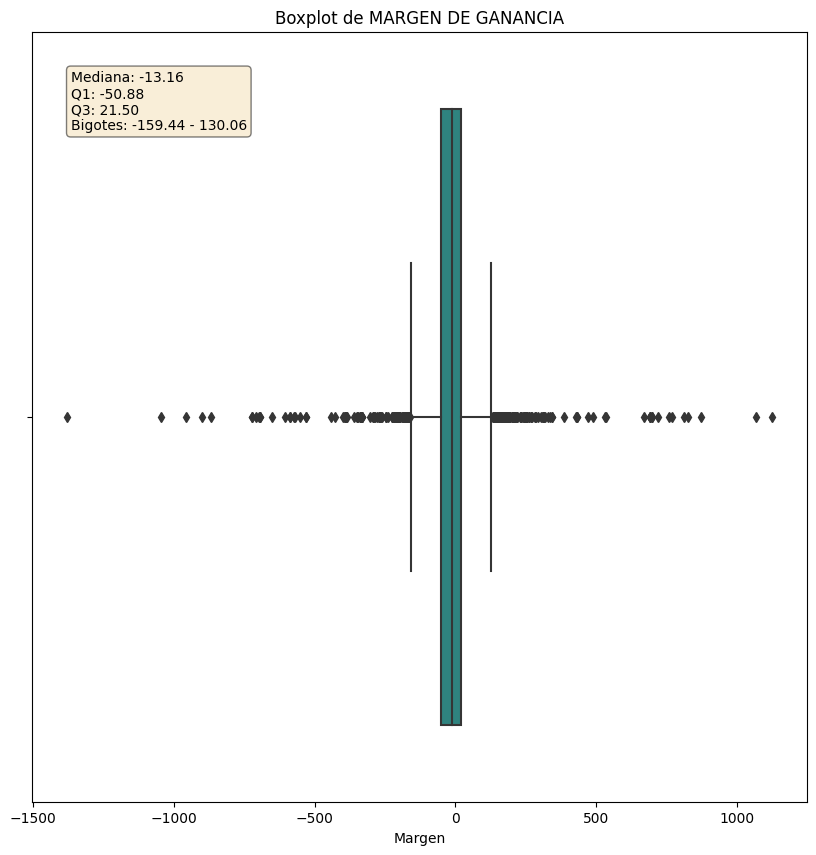

In [ ]:
#BOXPLOT DE LOS MARGENES DE GANANCIAS
plt.figure(figsize=(10, 10))
#sns.boxplot(x='Margen', data=df)
sns.boxplot(x='Margen', data=df, palette='viridis', showfliers=True, whis=1.5)
# Obtenemos la estadísticas descriptivas
descripcion_estadistica = df['Margen'].describe()
# Calculamos los Limites de los bigotes
whisker_bottom = descripcion_estadistica['25%'] - 1.5 * (descripcion_estadistica['75%'] - descripcion_estadistica['25%'])
whisker_top = descripcion_estadistica['75%'] + 1.5 * (descripcion_estadistica['75%'] - descripcion_estadistica['25%'])
# Presentamos los valores de los bigotes y la mediana previamente calculados
texto = f'Mediana: {descripcion_estadistica["50%"]:.2f}\nQ1: {descripcion_estadistica["25%"]:.2f}\nQ3: {descripcion_estadistica["75%"]:.2f}\nBigotes: {whisker_bottom:.2f} - {whisker_top:.2f}'
plt.text(0.05, 0.95, texto, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.title('Boxplot de MARGEN DE GANANCIA')
plt.show()

*Comentario*: Podemos desprender de la gráfica que existe una considerable cantidad de datos históricos (Márgenes) que son outliers, son data atípica, que posiblemente sean equipos vendidos con un valor muy por debajo de costo del equipo, quizá sean clientes especiales que tengan alguna promoción única. Por otro lado, los Bigotes y la amplitud de la caja nos indica que está muy concentrada, existe poca dispersión; así mismo se observa una configuración simétrica de la data, ausencia de sesgo.

<ipython-input-29-66310ba3f56d>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Margen'], bins=10, kde=True, palette='magma')


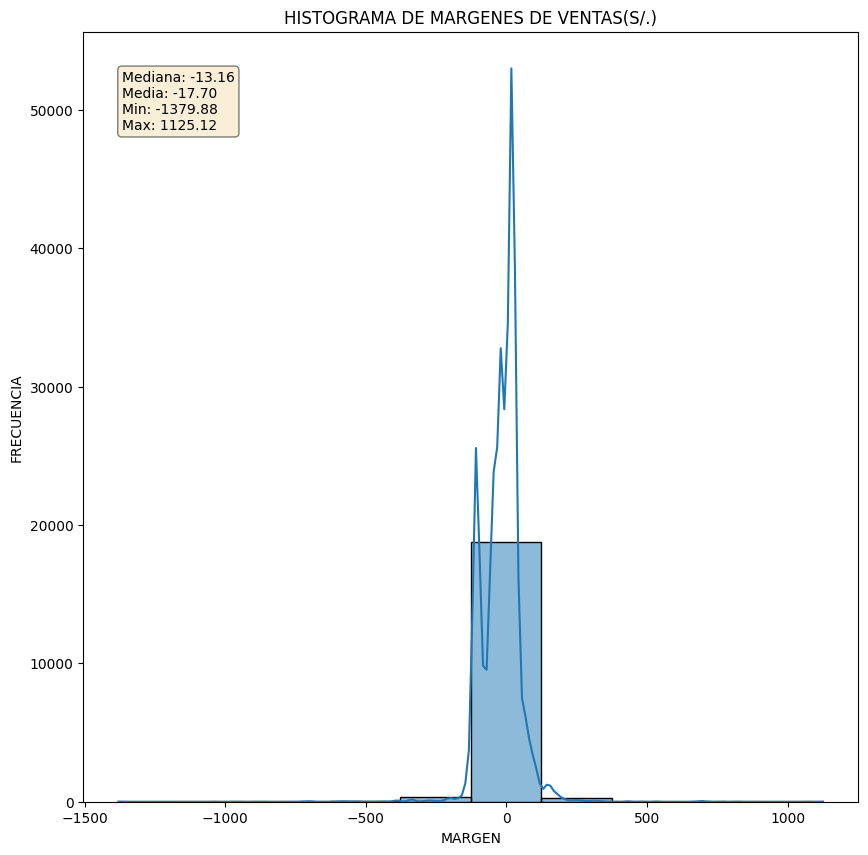

In [ ]:
# Histograma de la variable margen
plt.figure(figsize=(10, 10))
sns.histplot(df['Margen'], bins=10, kde=True, palette='magma')
# Obtenemos la estadísticas descriptiva de la variables
descripcion_estadistica = df['Margen'].describe()
# Presentamos los valores de la mediana y estadísticas anteriormente hallados
texto = f'Mediana: {descripcion_estadistica["50%"]:.2f}\nMedia: {descripcion_estadistica["mean"]:.2f}\nMin: {descripcion_estadistica["min"]:.2f}\nMax: {descripcion_estadistica["max"]:.2f}'
plt.text(0.05, 0.95, texto, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.title('HISTOGRAMA DE MARGENES DE VENTAS(S/.)')
plt.xlabel('MARGEN')
plt.ylabel('FRECUENCIA')
plt.show()

*Comentario*: Acerca del histograma podemos decir que es el mismo comportamiento mencionado anteriormente con el boxplot. Hay una alta concentración alrededor de la media -S/.17.70, esto nos dice que es muy poco la ganancia neta en algunos casos, pero también se pierde poco; esto se debe principalmente a las ventas por renovación y portabilidad donde cuya venta es por un valor inferior al costo del equipo. En un escenario optimista o normal de una tienda de venta de celulares se esperaría que la concentración (barra principal) debería estar más a la derecha y no tener muchos valores inferiores o cercanos a cero.

11. ¿Qué día del mes tuvo más margen?

In [ ]:
#Creamos una nueva fila en df para la fecha que contenga el año , mes y dia
df['fecha'] = pd.to_datetime('2021-10-' + df['Dia'].astype(str), format='%Y-%m-%d')
margenes_dia = df.groupby('fecha')['Margen'].sum().reset_index()
#Determinando el dia del mes de octubre que tuvo el mayor margen
dia_max_margen = margenes_dia.loc[margenes_dia['Margen'].idxmax()]['fecha']
margen_maximo = margenes_dia['Margen'].max()
#Hallamos que dia cae esa fecha, cambiando el formato extraendo solamente el dia
dia_semana = dia_max_margen.strftime('%A')
print(f"El día del mes con el mayor margen fue el {dia_max_margen.date()} que es {dia_semana} y fue de S/.{margen_maximo}.")

El día del mes con el mayor margen fue el 2021-10-01 que es Friday y fue de S/.-6146.52733.


*Comentario*: Según la base de datos, los márgenes de ganancia por la venta al cierre de un día son negativos, esto quiere decir que se vende a un precio inferior al costo del dispositivo, esto se debe al tipo de venta y estrategia comercial de la empresa (ventas por renovación y portabilidad) bajo esa salvedad el día que menor "Perdida" tuvo, fue el 01/10/2021 que es un viernes, cuyo monto fue de S/. -6146.527.

12. Realice un boxplot de la variable Ingreso y explíquelo a detalle indicando el
Promedio, Máximo, Mínimo y Desviación estándar. Aplique la librería seaborn y
separelo por gama

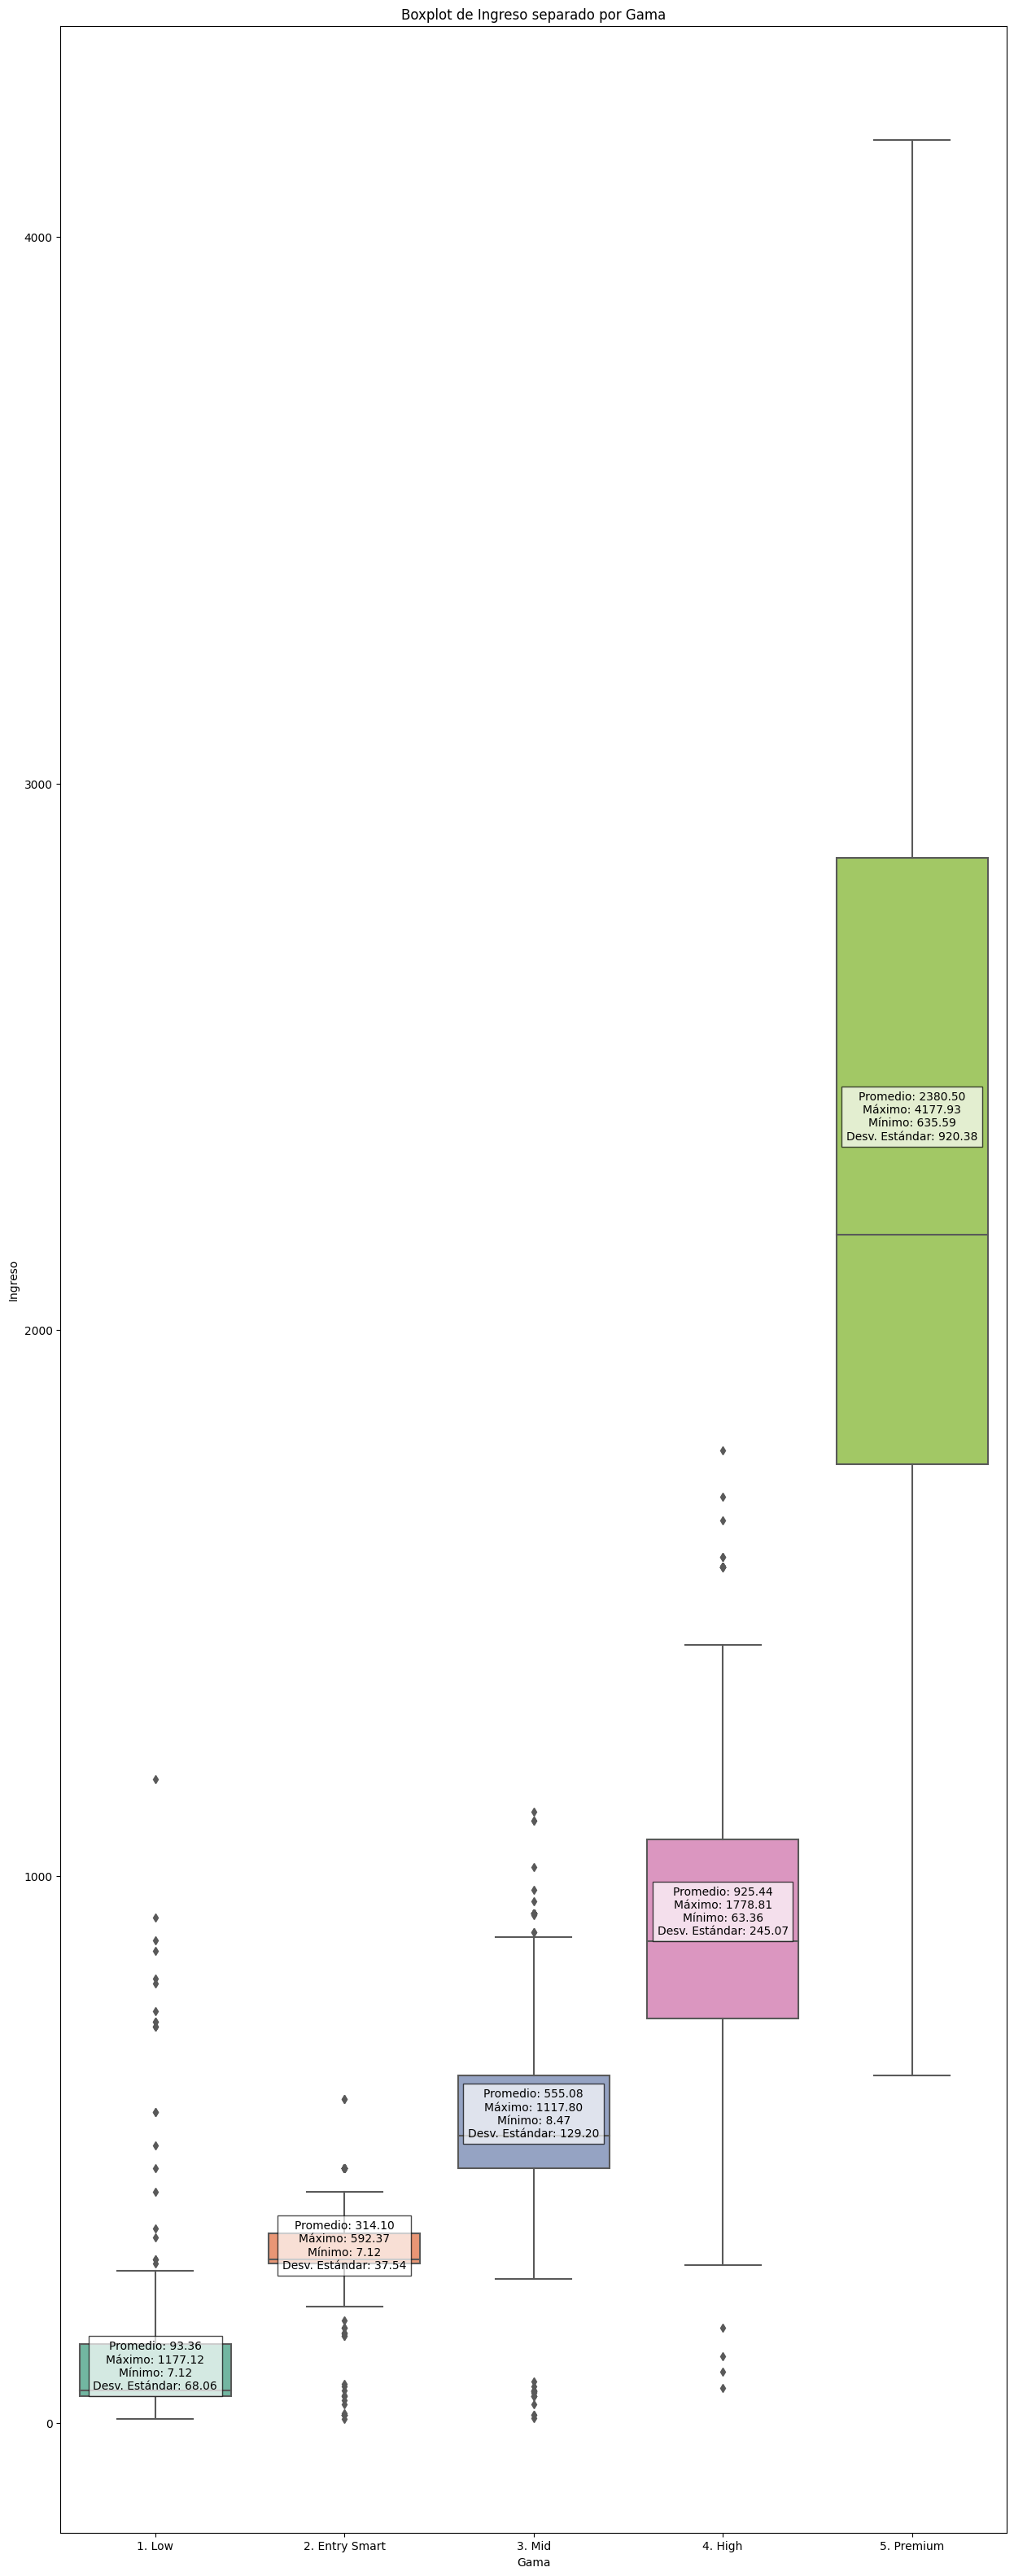

In [ ]:
# Filtrar las filas que tienen NaN en la columna 'Gama' y 'Ingreso'
df_gama_ingreso = df.dropna(subset=['Gama', 'Ingreso'])

# Calcula las estadísticas por cada gama para que esté separado por gama
stats_df = df_gama_ingreso.groupby('Gama')['Ingreso'].describe()

# Ajustar el tamaño del gráfico para una mejor visualización
plt.figure(figsize=(15, 40))

# Boxplot con uso de la libreria seaborn
sns.boxplot(x='Gama', y='Ingreso', data=df_gama_ingreso, palette='Set2')

# Agregando el promedio, máximo, mínimo y desviación estándar
for i, gama in enumerate(stats_df.index):
    plt.text(i, stats_df.loc[gama]['mean'] + 10, f"Promedio: {stats_df.loc[gama]['mean']:.2f}\nMáximo: {stats_df.loc[gama]['max']:.2f}\nMínimo: {stats_df.loc[gama]['min']:.2f}\nDesv. Estándar: {stats_df.loc[gama]['std']:.2f}",
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7))

plt.title('Boxplot de Ingreso separado por Gama')
plt.xlabel('Gama')
plt.ylabel('Ingreso')
plt.show()

Vemos que los equipos de gama Premium no tiene valores atípicos fuera de los cuartiles como las demás gamas dando a entender que tiene una distribución relativamente homogenea y que la mayoría de ingresos se encuentran dentro del rango. Por último que el rango de valores es más grande que la mediana en Low, Entry Smart, Mid y High

13. Haga un gráfico de correlación entre el Ingreso y la Rentabilidad, utilice la librería
seaborn para poder utilizar hue=Tipo Venta

Primero llenamos los datos de la rentabilidad con la formula

In [ ]:
# Calcular la rentabilidad
df['Rentabilidad'] = (df['Margen'] / df['Costo']) * 100

Confirmamos que se llenó de manera exitosa la rentabilidad

In [ ]:
df.head(2)

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Precio,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster,fecha
0,202110,13,Equipo,celular,smartphone,ZTE,1. Low,NaN,173.0339,192.39,-19.3561,-10.060866,Porta,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A,2021-10-13
1,202110,27,Equipo,celular,smartphone,Samsung,2. Entry Smart,NaN,355.2203,338.88,16.3403,4.821854,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B,2021-10-27


Hacemos el gráfico de correlación entre el ingreso y rentabilidad

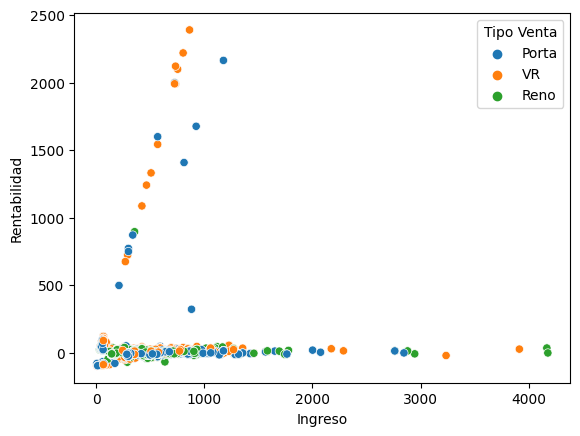

In [ ]:
# Crear un gráfico de dispersión con seaborn
sns.scatterplot(data=df, x='Ingreso', y='Rentabilidad', hue='Tipo Venta')

# Añadir leyenda
plt.legend(title='Tipo Venta')

# Mostrar el gráfico
plt.show()

Como no se puede apreciar bien la correlación vamos a definir un rango para el eje Y

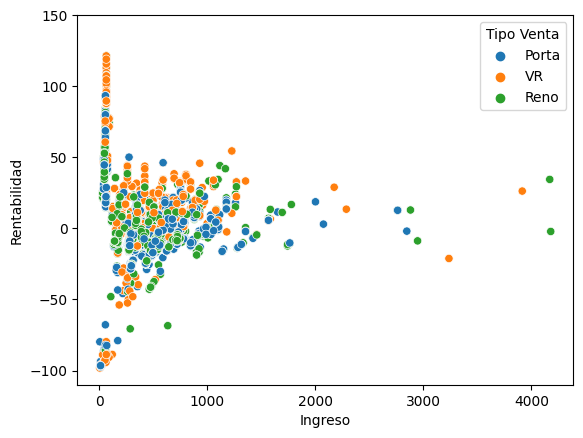

In [ ]:
# Crear un gráfico de dispersión con seaborn
sns.scatterplot(data=df, x='Ingreso', y='Rentabilidad', hue='Tipo Venta')

# Añadir leyenda
plt.legend(title='Tipo Venta')

# Especificar el rango para el eje y
plt.ylim(-110, 150)   # Rango para el eje y

# Mostrar el gráfico
plt.show()

Podemos apreciar que la mayoria de nuestros datos el tipo que en la mayoria ha tenido más rentabilidad es de Tipo de venta VR y que la mayoria de datos se concentra en el rango de -20 a 30

# CONCLUSIONES

Luego del análisis de la base de datos del registro histórico de las ventas de celulares y Features(celulares básicos), se desprende las siguientes conclusiones.


1.   Los márgenes de ventas para todos los días del mes de octubre, son negativos, esto nos podríamos erróneamente indicar problemas de perdidas; sin embargo, por la naturaleza del negocio, la empresa genera mayores ingresos por el servicio post-venta como los planes de internet, llamadas, entre otros. Por otro lado, también se puede explicar la existencia muy frecuente de los outliers, para márgenes muy negativos, vendría a ser los clientes preferencias o premium que son muy importantes para la empresa que renueven sus celulares, por lo que se les ofrece equipos muy baratos; pero para los outliers muy positivos son clientes que solamente compran el equipo sin ninguna promoción, a ellos si se les ofrece precios superiores al costo del equipo.
2.  Se concluye también que la Gama que tiene mayor margen de ganancia mayormente son las Low porque se aprecia que sus costos son mucho menores a sus ingresos, a diferencia de otras gamas, y que por canal de ventas los márgenes son negativos a excepción de Tiendas  e Islas, y que mayoritariamente sus canal de ventas es VR que proporciona márgenes más altos.



Luego de analizar nuestra base de datos, se tiene de conclusion sobre los ingresos de los cluster lo siguiente:
1. En el análisis de datos sobre los ingresos generados sobre los clúster de venta de celulares, esto facilita la identificación de los cluster más y menos rentables de manera rápida y sencilla, lo que puede ser crucial para la toma de decisiones. Además, al identificar el cluster con los mayores ingresos, se destaca una oportunidad importante para enfocar estrategias de marketing.

Luego de analizar nuestra base de datos sacamos las siguientes conclusiones de acuerdo al gráfico de correlación de ingreso y rentabildiad:
1. La mayoria de datos de las ventas de equipos de nuestra base de datos se concentran en respecto al rango de ingreso de 0 a 1000 y con respecto al rango de rentabilidad de -20 a 30. Quiere decir que la mayoria de ventas registradas de equipos están en un ingreso en rango de 0 a 1000 con una rentabilidad de -20 a 30.
